<div style="border:solid green 2px; padding: 20px">
    
<b>Дмитрий, привет! Это Александр</b> Я рад тебя видеть на финальном спринте (SQL).

---

Я буду красить комментарии цветом, пожалуйста, не удаляй их:

<div class="alert alert-block alert-danger">✍
    

__Комментарий от тимлида №1__

Такой комментарий нужно исправить обязательно, он критически влияет на удачное выполнение проекта.
</div>
    
---

<div class="alert alert-block alert-warning">📝
    

__Комментарий от тимлида №1__


Такой комментарий является рекомендацией или советом. Можешь использовать их на своё усмотрение.
</div>

---

<div class="alert alert-block alert-success">✔️
    

__Комментарий от тимлида №1__

Такой комментарий  говорит о том, что было сделано что-то качественное и правильное =)
</div>
    
---
    
Предлагаю работать над проектом в диалоге: если у тебя возникают вопросы — пиши об этом в слаке, не стесняйся. Так же, мне будет легче отследить изменения, если ты выделишь свои комментарии:   
    
<div class="alert alert-info"> <b>Комментарии студента:</b> Например, вот так.</div>
    
    
---

# Выпускной проект. SQL

# Описание

Коронавирус застал мир врасплох, изменив привычный порядок вещей. В свободное время жители городов больше не выходят на улицу, не посещают кафе и торговые центры. Зато стало больше времени для книг. Это заметили стартаперы — и бросились создавать приложения для тех, кто любит читать.

Ваша компания решила быть на волне и купила крупный сервис для чтения книг по подписке. Ваша первая задача как аналитика — проанализировать базу данных.
В ней — информация о книгах, издательствах, авторах, а также пользовательские обзоры книг. Эти данные помогут сформулировать ценностное предложение для нового продукта.

### Описание данных

**Таблица `books`**

Содержит данные о книгах:

- `book_id` — идентификатор книги;
- `author_id` — идентификатор автора;
- `title` — название книги;
- `num_pages` — количество страниц;
- `publication_date` — дата публикации книги;
- `publisher_id` — идентификатор издателя.

**Таблица `authors`**

Содержит данные об авторах:

- `author_id` — идентификатор автора;
- `author` — имя автора.

**Таблица `publishers`**

Содержит данные об издательствах:

- `publisher_id` — идентификатор издательства;
- `publisher` — название издательства;

**Таблица `ratings`**

Содержит данные о пользовательских оценках книг:

- `rating_id` — идентификатор оценки;
- `book_id` — идентификатор книги;
- `username` — имя пользователя, оставившего оценку;
- `rating` — оценка книги.

**Таблица `reviews`**

Содержит данные о пользовательских обзорах на книги:

- `review_id` — идентификатор обзора;
- `book_id` — идентификатор книги;
- `username` — имя пользователя, написавшего обзор;
- `text` — текст обзора.

<a class="anchor" id="0"></a>

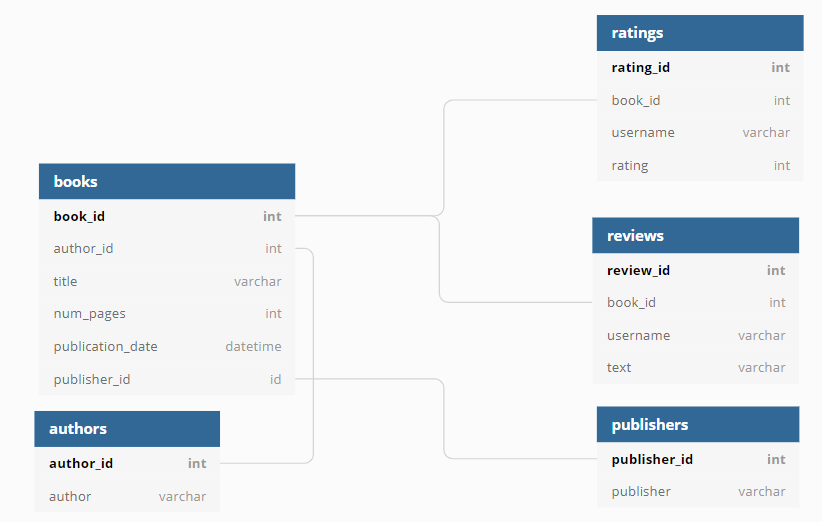

# Задания

- [Посчитаем, сколько книг вышло после 1 января 2000 года;](#1)
- [Для каждой книги посчитаем количество обзоров и среднюю оценку;](#2)
- [Определим издательство, которое выпустило наибольшее число книг толще 50 страниц — так мы исключите из анализа брошюры;](#3)
- [Определим автора с самой высокой средней оценкой книг — учитываем только книги с 50 и более оценками;](#4)
- [Посчитаем среднее количество обзоров от пользователей, которые поставили больше 50 оценок.](#5)

<div class="alert alert-block alert-success">✔️
    

__Комментарий от тимлида №1__

Здорово, что не забываешь про оформление проекта
</div>

# Загрузка библиотек и данных

In [1]:
import pandas as pd
from sqlalchemy import create_engine

In [2]:
# устанавливаем параметры

db_config = {'user': 'praktikum_student', # имя пользователя
'pwd': 'Sdf4$2;d-d30pp', # пароль
'host': 'rc1b-wcoijxj3yxfsf3fs.mdb.yandexcloud.net',
'port': 6432, # порт подключения
'db': 'data-analyst-final-project-db'} # название базы данных
connection_string = 'postgresql://{}:{}@{}:{}/{}'.format(db_config['user'],
 db_config['pwd'],
 db_config['host'],
 db_config['port'],
 db_config['db'])

# сохраняем коннектор
engine = create_engine(connection_string, connect_args={'sslmode':'require'}) 

# Исследуем таблицы

**датафрейм** `books`

In [3]:
query = '''
SELECT *
FROM books
LIMIT 5
'''
display(pd.io.sql.read_sql(query, con = engine))
pd.io.sql.read_sql(query, con = engine).info()
pd.io.sql.read_sql(query, con = engine).duplicated().sum()

,book_id,author_id,title,num_pages,publication_date,publisher_id
0,1,546,'Salem's Lot,594,2005-11-01,93
1,2,465,1 000 Places to See Before You Die,992,2003-05-22,336
2,3,407,13 Little Blue Envelopes (Little Blue Envelope...,322,2010-12-21,135
3,4,82,1491: New Revelations of the Americas Before C...,541,2006-10-10,309
4,5,125,1776,386,2006-07-04,268


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   book_id           5 non-null      int64 
 1   author_id         5 non-null      int64 
 2   title             5 non-null      object
 3   num_pages         5 non-null      int64 
 4   publication_date  5 non-null      object
 5   publisher_id      5 non-null      int64 
dtypes: int64(4), object(2)
memory usage: 368.0+ bytes


0

**датафрейм** `authors`

In [4]:
query = '''
SELECT *
FROM authors
LIMIT 5
'''
display(pd.io.sql.read_sql(query, con = engine))
pd.io.sql.read_sql(query, con = engine).info()
pd.io.sql.read_sql(query, con = engine).duplicated().sum()

,author_id,author
0,1,A.S. Byatt
1,2,Aesop/Laura Harris/Laura Gibbs
2,3,Agatha Christie
3,4,Alan Brennert
4,5,Alan Moore/David Lloyd


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   author_id  5 non-null      int64 
 1   author     5 non-null      object
dtypes: int64(1), object(1)
memory usage: 208.0+ bytes


0

**датафрейм** `reviews`

In [5]:
query = '''
SELECT *
FROM reviews
LIMIT 5
'''
display(pd.io.sql.read_sql(query, con = engine))
pd.io.sql.read_sql(query, con = engine).info()
pd.io.sql.read_sql(query, con = engine).duplicated().sum()

,review_id,book_id,username,text
0,1,1,brandtandrea,Mention society tell send professor analysis. ...
1,2,1,ryanfranco,Foot glass pretty audience hit themselves. Amo...
2,3,2,lorichen,Listen treat keep worry. Miss husband tax but ...
3,4,3,johnsonamanda,Finally month interesting blue could nature cu...
4,5,3,scotttamara,Nation purpose heavy give wait song will. List...


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review_id  5 non-null      int64 
 1   book_id    5 non-null      int64 
 2   username   5 non-null      object
 3   text       5 non-null      object
dtypes: int64(2), object(2)
memory usage: 288.0+ bytes


0

**датафрейм** `ratings`

In [6]:
query = '''
SELECT *
FROM ratings
LIMIT 5
'''
display(pd.io.sql.read_sql(query, con = engine))
pd.io.sql.read_sql(query, con = engine).info()
pd.io.sql.read_sql(query, con = engine).duplicated().sum()

,rating_id,book_id,username,rating
0,1,1,ryanfranco,4
1,2,1,grantpatricia,2
2,3,1,brandtandrea,5
3,4,2,lorichen,3
4,5,2,mariokeller,2


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   rating_id  5 non-null      int64 
 1   book_id    5 non-null      int64 
 2   username   5 non-null      object
 3   rating     5 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 288.0+ bytes


0

**датафрейм** `publishers`

In [7]:
query = '''
SELECT *
FROM publishers
LIMIT 5
'''
display(pd.io.sql.read_sql(query, con = engine))
pd.io.sql.read_sql(query, con = engine).info()
pd.io.sql.read_sql(query, con = engine).duplicated().sum()

,publisher_id,publisher
0,1,Ace
1,2,Ace Book
2,3,Ace Books
3,4,Ace Hardcover
4,5,Addison Wesley Publishing Company


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   publisher_id  5 non-null      int64 
 1   publisher     5 non-null      object
dtypes: int64(1), object(1)
memory usage: 208.0+ bytes


0

<div class="alert alert-info"> <b>Комментарии студента №1:</b> Посмотрели все таблицы, данные в порядке, пропусков и дубликатов нет.</div>

<div class="alert alert-block alert-danger">✍
    

__Комментарий от тимлида №1__

Отсутствует проверка на дубликаты (можно с помощью pandas)
</div>

<div class="alert alert-block alert-success">✔️
    

__Комментарий от тимлида №2__

Отлично первые взгляд на данные есть. Ты корректно выгрузил данные и посмотрел их содержимое
</div>

## Задача 1 <a class="anchor" id="1"></a>
### Сколько книг вышло после 1 января 2000 года?

In [8]:
query = '''
SELECT
    COUNT(DISTINCT book_id) AS book_cnt
FROM
    books
WHERE
    publication_date > '2000-01-01'
'''
pd.io.sql.read_sql(query, con = engine)

,book_cnt
0,819


### ----- *После 1 января 2000 года вышло 819 книг* -----

<div class="alert alert-block alert-success">✔️
    

__Комментарий от тимлида №1__

Расчёт верный
</div>

## Задача 2 <a class="anchor" id="1"></a>
### Для каждой книги посчитаем количество обзоров и среднюю оценку

In [9]:
query = '''
SELECT 
    books.book_id AS id,
    books.title AS name,
    COUNT(DISTINCT reviews.text) AS cnt_reviews,
    ROUND(AVG(ratings.rating), 2) AS avg_rating
FROM
    books
LEFT JOIN ratings ON ratings.book_id = books.book_id
LEFT JOIN reviews ON reviews.book_id = books.book_id
GROUP BY
    name,
    id
ORDER BY
    cnt_reviews DESC

'''
pd.io.sql.read_sql(query, con = engine)

,id,name,cnt_reviews,avg_rating
0,948,Twilight (Twilight #1),7,3.66
1,963,Water for Elephants,6,3.98
2,734,The Glass Castle,6,4.21
3,302,Harry Potter and the Prisoner of Azkaban (Harr...,6,4.41
4,695,The Curious Incident of the Dog in the Night-Time,6,4.08
...,...,...,...,...
995,83,Anne Rice's The Vampire Lestat: A Graphic Novel,0,3.67
996,808,The Natural Way to Draw,0,3.00
997,672,The Cat in the Hat and Other Dr. Seuss Favorites,0,5.00
998,221,Essential Tales and Poems,0,4.00


### ----- *Рейтинг и количество рецензий* -----

<div class="alert alert-block alert-danger">✍
    

__Комментарий от тимлида №1__

Ты вывел только те книги, у которых есть текстовые отзывы reviews, а ведь у книг без отзывов оценки никуда не делись и их по задаче необходимо вывести. 
</div>

<div class="alert alert-info"> <b>Комментарии студента №1:</b> Поправил </div>

<div class="alert alert-block alert-success">✔️
    

__Комментарий от тимлида №2__

Грамотный шаг, что добавил колонку с названием книг
</div>

## Задача 3 <a class="anchor" id="1"></a>
### Определить издательство, которое выпустило наибольшее число книг толще 50 страниц — так мы исключим из анализа брошюры

In [10]:
query = '''
SELECT publishers.publisher, COUNT(books.book_id) AS cnt_books
FROM books
LEFT JOIN publishers ON books.publisher_id = publishers.publisher_id
WHERE books.book_id IN
    (SELECT books.book_id
     FROM books
     GROUP BY books.book_id
     HAVING books.num_pages > 50)
GROUP BY publishers.publisher
ORDER BY COUNT(books.book_id) DESC
LIMIT 1;

'''
pd.io.sql.read_sql(query, con = engine)

,publisher,cnt_books
0,Penguin Books,42


### ----- *Издательство Penguin Books выпустило больше всего книг - 42* -----

<div class="alert alert-block alert-success">✔️
    

__Комментарий от тимлида №1__

Согласен с результатом. Действительно данное издательство является лидером по выпущенным книгам
</div>

## Задача 4 <a class="anchor" id="1"></a>
### Определить автора с самой высокой средней оценкой книг — учитываем только книги с 50 и более оценками

In [11]:
query = '''
SELECT 
    authors.author,
    AVG(ratings.rating) AS avg_rating
FROM 
    books
LEFT JOIN ratings on books.book_id = ratings.book_id
LEFT JOIN authors on books.author_id = authors.author_id
WHERE
    books.book_id IN (
        SELECT ratings.book_id
        FROM ratings
        GROUP BY ratings.book_id
        HAVING COUNT(ratings.rating) > 50)
GROUP BY authors.author
ORDER BY avg_rating DESC
LIMIT 1;
'''
pd.io.sql.read_sql(query, con = engine)

,author,avg_rating
0,J.K. Rowling/Mary GrandPré,4.287097


<div class="alert alert-block alert-success">✔️
    

__Комментарий от тимлида №1__
    
После стольких лет? Всегда...

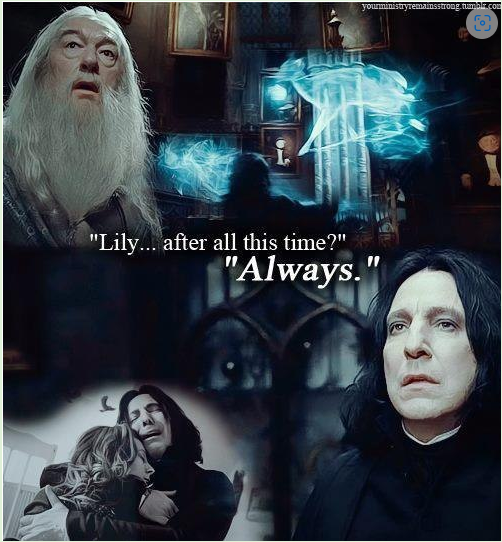

<div class="alert alert-info"> <b> Ахах, Гарри форевер))</b> </div>

<div class="alert alert-block alert-success">✔️
    

__Комментарий от тимлида №2__

^^
</div>

### ----- Автор с самой высокой средней оценкой книг -  J.K. Rowling/Mary GrandPré -----

## Задача 5 <a class="anchor" id="1"></a>
### Посчитаем среднее количество обзоров от пользователей, которые поставили больше 50 оценок

In [12]:
query = '''
SELECT AVG(r.count) AS avg_review
FROM 
    (SELECT count(*)
     FROM reviews
     WHERE username IN
         (SELECT username
          FROM ratings
          GROUP BY username
          HAVING count(rating) > 50)
    GROUP BY username) AS r;

'''
pd.io.sql.read_sql(query, con = engine)

,avg_review
0,24.333333


<div class="alert alert-block alert-success">✔️
    

__Комментарий от тимлида №1__

Ты корректно отобрал пользователей и рассчитал их показатели.

### ----- Cреднее количество обзоров пользователей, которые поставили больше 50 оценок, составляет 24 -----

[вернуться наверх](#0)

<div class="alert alert-block alert-danger">✍
    

__Комментарий от тимлида №1__

Отсутствует финальный вывод. Поправь, пожалуйста
</div>

# Вывод

<div class="alert alert-info"> 
    
Посмотрели, что после 1 января 2000 года вышло <b> 819 книг</b>;
    
Создали таблицу, <b>посчитав книги со средней оценкой и пользовательскими обзорами</b>;    
    
Создали таблицу, в которой лежит <b> список всех издательств, которые выпускают книги от 50 страниц </b> и определили издательство, которое выпустило наибольшее число таких книг;
    
Создали таблицу, со <b> списком авторов с самой высокой средней оценкой</b>, учитывали книги, которые имеют больше 50 оценок;
    
Определили среднее количество обзоров на книги более, чем с 50 оценками - это <b>в среднем 24 обзора </b> от пользователей.

</div>

<div class="alert alert-block alert-success">✔️
    

__Комментарий от тимлида №2__

Получилась хорошая работа, развернутый итоговый вывод придает ей вид законченного проекта. Поздравляю с окончанием курса! У тебя получилось справиться со всеми задачами. 
</div>